# k-NN algorithm to predict whether a tweet will go viral

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [16]:
# read in the data
all_tweets = pd.read_json("random_tweets.json", lines=True)

# get used to the data
print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[0]['text'])
print(all_tweets.loc[0]['user']['location'])

11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
Waterloo, Iowa


In [17]:
# define viral tweet: viral if retweets are above average
median_retweets = all_tweets['retweet_count'].median()
print(median_retweets)
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] >= median_retweets, 1, 0)
print(all_tweets['is_viral'].value_counts())

13.0
1    5591
0    5508
Name: is_viral, dtype: int64


In [18]:
# make features from the data
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)

In [19]:
# normalize the data
labels = all_tweets['is_viral']
data = all_tweets[['tweet_length','followers_count','friends_count']]
scaled_data = scale(data, axis=0)

print(scaled_data[0])

[ 0.6164054  -0.02878298 -0.14483305]


In [20]:
# create train-test split
train_data, test_data, train_labels, test_labels = train_test_split(scaled_data, labels, test_size = 0.2, random_state = 1)

In [23]:
# use k-NN algorithm
scores = []
for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    scores.append(classifier.score(test_data, test_labels))

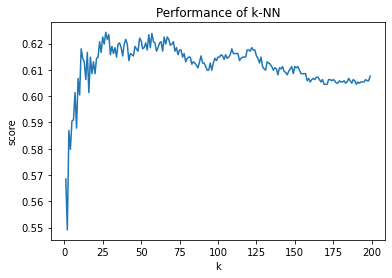

In [24]:
# plot the results  
plt.plot(range(1,200), scores)
plt.xlabel('k')
plt.ylabel('score')
plt.title('Performance of k-NN')
plt.show()